In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

C:\Users\UTKARSH\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_titanic=pd.read_excel("titanic.xlsx")
print(data_titanic.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [3]:
print("Total number of passengers travelling:",str(len(data_titanic)))


Total number of passengers travelling: 1309


In [4]:
sexwise_list=data_titanic['sex'].tolist()

In [5]:
print("Total male passengers",sexwise_list.count('male'))
print("Total female passengers",sexwise_list.count('female'))

Total male passengers 843
Total female passengers 466


<AxesSubplot:xlabel='survived', ylabel='count'>

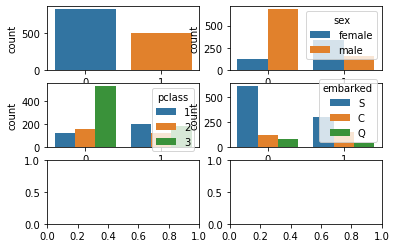

In [6]:
fig, ax=plt.subplots(3,2)
sns.countplot(x="survived",data=data_titanic,ax=ax[0][0])
sns.countplot(x="survived",hue='sex',data=data_titanic,ax=ax[0][1])
sns.countplot(x="survived",hue='pclass',data=data_titanic,ax=ax[1][0])
sns.countplot(x="survived",hue='embarked',data=data_titanic,ax=ax[1][1])

In [7]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:

#Data Wrangling
print(data_titanic.isnull())
print(data_titanic.isnull().sum())
sns.heatmap(data_titanic.isnull(),yticklabels='false',cmap='viridis',ax=ax[2][0])

      pclass  survived   name    sex    age  sibsp  parch  ticket   fare  \
0      False     False  False  False  False  False  False   False  False   
1      False     False  False  False  False  False  False   False  False   
2      False     False  False  False  False  False  False   False  False   
3      False     False  False  False  False  False  False   False  False   
4      False     False  False  False  False  False  False   False  False   
...      ...       ...    ...    ...    ...    ...    ...     ...    ...   
1304   False     False  False  False  False  False  False   False  False   
1305   False     False  False  False   True  False  False   False  False   
1306   False     False  False  False  False  False  False   False  False   
1307   False     False  False  False  False  False  False   False  False   
1308   False     False  False  False  False  False  False   False  False   

      cabin  embarked   boat   body  home.dest  
0     False     False  False   True   

<AxesSubplot:>

In [9]:
data_titanic.drop('body',axis=1,inplace=True)
data_titanic.drop('cabin',axis=1,inplace=True)
data_titanic.drop('boat',axis=1,inplace=True)
data_titanic.drop('home.dest',axis=1,inplace=True)
data_titanic.drop('age',axis=1,inplace=True)
sns.heatmap(data_titanic.isnull(),yticklabels='false',cmap='viridis',ax=ax[2][1])

<AxesSubplot:>

In [10]:
#To replace all non categorical data to categorical one
sex_categorical=pd.get_dummies(data_titanic['sex'])
print(sex_categorical)
sex_categorical=pd.get_dummies(data_titanic['sex'],drop_first=True)

      female  male
0          1     0
1          0     1
2          1     0
3          0     1
4          1     0
...      ...   ...
1304       1     0
1305       1     0
1306       0     1
1307       0     1
1308       0     1

[1309 rows x 2 columns]


In [11]:
embarked_categorical=pd.get_dummies(data_titanic['embarked'])
print(embarked_categorical)
embarked_categorical=pd.get_dummies(data_titanic['embarked'],drop_first=True)

      C  Q  S
0     0  0  1
1     0  0  1
2     0  0  1
3     0  0  1
4     0  0  1
...  .. .. ..
1304  1  0  0
1305  1  0  0
1306  1  0  0
1307  1  0  0
1308  0  0  1

[1309 rows x 3 columns]


In [12]:
#Concatinating
data_titanic=pd.concat([data_titanic,sex_categorical,embarked_categorical],axis=1)

In [13]:
data_titanic.drop(['sex','embarked','name','pclass'],axis=1,inplace=True)
print(data_titanic.head(5))

   survived  sibsp  parch  ticket      fare  male  Q  S
0         1      0      0   24160  211.3375     0  0  1
1         1      1      2  113781  151.5500     1  0  1
2         0      1      2  113781  151.5500     0  0  1
3         0      1      2  113781  151.5500     1  0  1
4         0      1      2  113781  151.5500     0  0  1


In [14]:
y=data_titanic['survived']
x=data_titanic.drop(['survived','ticket'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [16]:
X_train.fillna(X_train.mean(),inplace=True)
Y_train.fillna(Y_train.mean(),inplace=True)

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [18]:
predictions=logmodel.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.7939814814814815
